In [ ]:
# Import libraries
from google.colab import drive
import os
import pickle
import numpy as np
import pandas as pd
from scipy import interp
from itertools import cycle
import math 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras_preprocessing.image import img_to_array, array_to_img, ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from tensorflow.keras.applications import  MobileNet, MobileNetV2

In [ ]:
# Connect with Google Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def concat_dataset(path, img_size = 224):
  '''
  Resize imgs and concatanete imgs from all the categories into one dataset.

  Parameters
  ----------
  path : string
      Path to dataset folder.
  img_size : int
      Size of image after resizing. Default is 224.

  Returns
  -------
  X : numpy array 
      Contains all the data from different categories.
  y : numpy array
      Containts labels for the data.
  '''

  X = [] 
  y = []

  if os.path.isdir(path):  # check if directory exist and get all filenames
    for foldername in os.listdir(path):

      dirname  = path + foldername
      print(dirname)
      
      if os.path.isdir(dirname):
        for filename in os.listdir(dirname):

            filedir = dirname + "/" + filename
            print(filedir)

            img = cv2.imread(filedir)
            img_resized = img_to_array(array_to_img(img, scale = False).resize((img_size, img_size))) # default is linear interpolation
            img_color = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) # convert image to RGB color space
            
            X.append(img_color)
            y.append(int(foldername)) # label is contained in folder name

  return np.asarray(X), np.asarray(y)

In [ ]:
def load_data(path, filename):
  '''
  Loads data from a pickle file.

  Parameters
  ----------
  data: numpy array
  path : string
      Path to folder containing the data.
  filename : string
      Name the file to be saved under.
      
  Returns
  -------
  data : numpy array
  '''

  with open(path + filename, 'rb') as output:
    data = pickle.load(output)

  return data

In [ ]:
def save_data(data, path, filename):
  '''
  Saves data to a pickle file.

  Parameters
  ----------
  data : numpy array
      Data to be saved.
  path : string
      Path to folder.
  filename : string
      Name the file to be saved under.

  Returns
  -------
  None

  '''

  with open(path + filename, 'wb') as output:
    pickle.dump(data, output)

In [ ]:
path = "/content/drive/My Drive/DataScience/"
class_names = ['indoor selfie', 'outdoor selfie', 'indoor pose', 'outdoor pose', 'no human']

# Load Data

In [ ]:
# Create the dataset
# X, y = concat_dataset('/content/drive/My Drive/DataScience/Dataset/')

/content/drive/My Drive/DataScience/Dataset/0
/content/drive/My Drive/DataScience/Dataset/0/img_1.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_10.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_12.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_8.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_16.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_4.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_6.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_3.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_2.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_14.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_18.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_5.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_15.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_13.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_9.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_7.jpg
/content/drive/My Drive/DataScience/Dataset/0/img_1

In [ ]:
# Save the data
# save_data(X, '/content/drive/My Drive/DataScience/Dataset concat/', filename = 'dataset.pickle')
# save_data(y, '/content/drive/My Drive/DataScience/Dataset concat/', filename = 'labels.pickle')

In [ ]:
# Load the data
X = load_data('/content/drive/My Drive/DataScience/Dataset concat/', 'dataset.pickle')
y = load_data('/content/drive/My Drive/DataScience/Dataset concat/', 'labels.pickle')

# Preprocess Data

In [ ]:
# Check datatype and value range
print(X.dtype)
print(np.max(X))
print(np.min(X))

float32
255.0
0.0


In [ ]:
# Normalize the dataset:
X = X/255.0

In [ ]:
# Split the data on train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3851, 224, 224, 3), (963, 224, 224, 3), (3851,), (963,))

In [ ]:
# Save original labels
y_train1 = y_train
y_test1 = y_test

In [ ]:
# One hot encode outputs
y_train = y_train.reshape(-1,1)
y_train.shape

y_test = y_test.reshape(-1,1)
y_test.shape

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

# Visualize Data

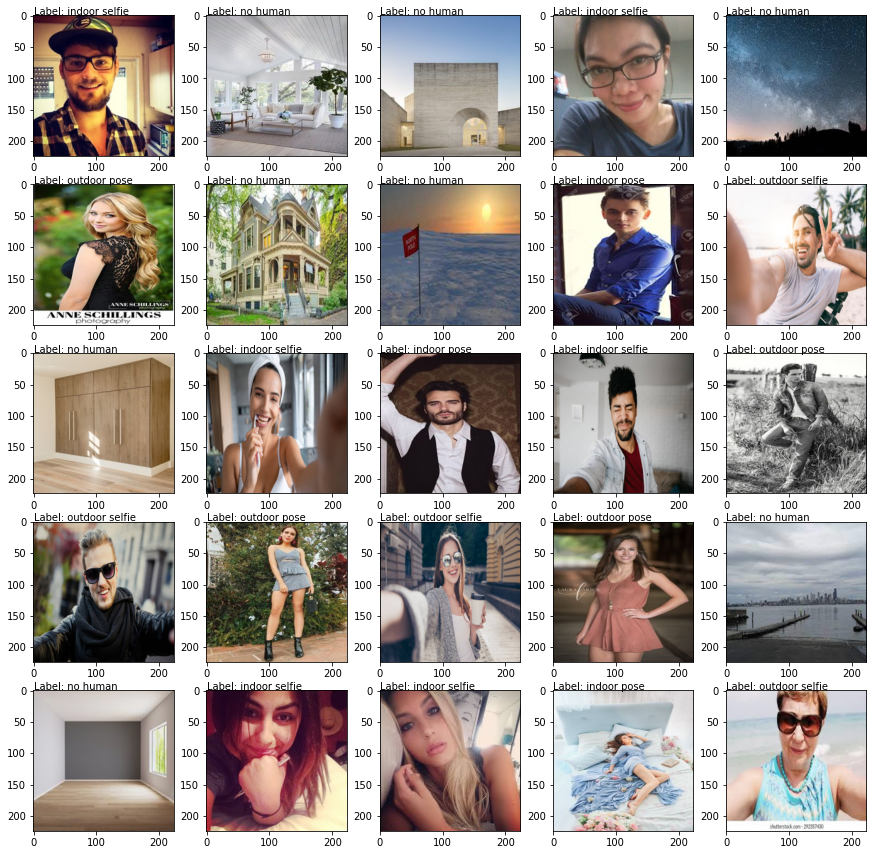

In [ ]:
# Visualizing the first 25 images from the training set:
fig = plt.figure(figsize = (15, 15))

for i in range(25):
    ax1 = fig.add_subplot(5, 5, i+1)
    ax1.imshow(X_train[i])
    title = "Label: " + str(class_names[y_train1[i]])
    ax1.text(0, -1, title, size = 10)

plt.show()

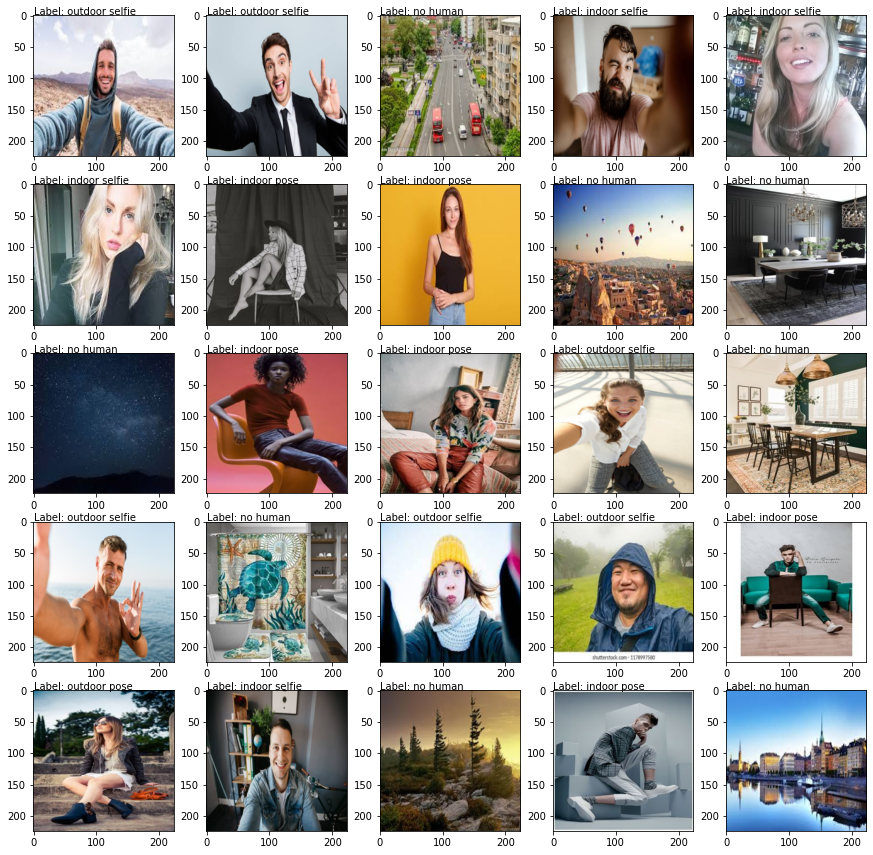

In [ ]:
# Visualizing the first 25 images from the validation set:
fig = plt.figure(figsize = (15, 15))

for i in range(25):
    ax1 = fig.add_subplot(5, 5, i+1)
    ax1.imshow(X_test[i])
    title = "Label: " + str(class_names[y_test1[i]])
    ax1.text(0, -1, title, size = 10)

plt.show()

In [ ]:
# Visualize data distribution
y_df = pd.DataFrame(y, columns = ['categories'])

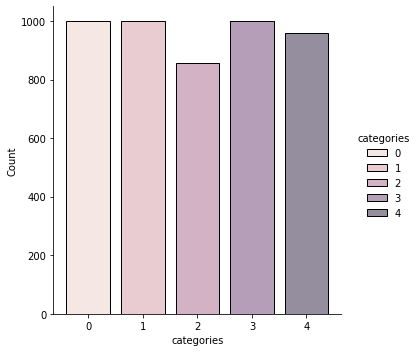

In [ ]:
sns.displot(y_df, x = "categories", shrink = .8, hue = "categories", discrete = True)

# Model


In [ ]:
# Set hyper-parameters for the model
epochs = 30
loss = 'categorical_crossentropy'
optimizer = 'sgd'
metrics = ['accuracy']

In [ ]:
# Data augmentation
# datagen = ImageDataGenerator(
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    shear_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

# datagen.fit(X_train)

In [ ]:
# Save the trained data generator
# save_data(datagen, '/content/drive/My Drive/DataScience/Augmentation example/', 'datagen.pickle')

In [ ]:
# Load data generator
datagen = load_data('/content/drive/My Drive/DataScience/Augmentation example/', 'datagen.pickle')

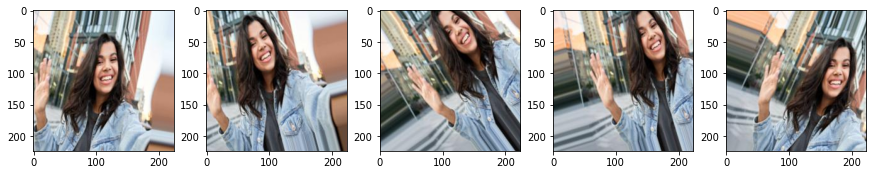

In [ ]:
# Visualise few augmented examples
aug = []
dirname = '/content/drive/My Drive/DataScience/Augmentation example/'

for filename in os.listdir(dirname):
  if filename.endswith('jpg'):
    filedir = dirname + filename

    img = cv2.imread(filedir)
    img_resized = img_to_array(array_to_img(img, scale = False).resize((224, 224))) #default is linear interpolation
    img_color = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    aug.append(img_color/255)

fig = plt.figure(figsize = (15, 15))

for i in range(5):
    ax1 = fig.add_subplot(5, 5, i+1)
    ax1.imshow(aug[i])

plt.show()

In [ ]:
# Create the model

# Freeze convolutional base
conv_base = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.trainable = False

# Add classifier on top of the conv base
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               12845312  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 16,075,461
Trainable params: 12,846,597
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

## Model train and save


In [ ]:
# Define early stopping criterion and save best model
callback_1 = ModelCheckpoint(filepath = '/content/drive/My Drive/DataScience/Models/best_model_mobile.pt', monitor='val_accuracy', save_best_only = True, mode='max', verbose=1)
callback_2 = EarlyStopping(patience = 15)
callback_list = [callback_1, callback_2]

In [ ]:
# Train the model
training_history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data = (X_test, y_test), 
            steps_per_epoch = len(X_train)/32, epochs=epochs, callbacks = callback_list, verbose = 1)

Epoch 1/30
120/120 [==============================] - 99s 344ms/step - loss: 3.6494 - accuracy: 0.5677 - val_loss: 0.2233 - val_accuracy: 0.9065

Epoch 00001: val_accuracy improved from -inf to 0.90654, saving model to /content/drive/My Drive/DataScience/Models/best_model_mobile.pt
INFO:tensorflow:Assets written to: /content/drive/My Drive/DataScience/Models/best_model_mobile.pt/assets
Epoch 2/30
120/120 [==============================] - 40s 330ms/step - loss: 0.2960 - accuracy: 0.8899 - val_loss: 0.2005 - val_accuracy: 0.9263

Epoch 00002: val_accuracy improved from 0.90654 to 0.92627, saving model to /content/drive/My Drive/DataScience/Models/best_model_mobile.pt
INFO:tensorflow:Assets written to: /content/drive/My Drive/DataScience/Models/best_model_mobile.pt/assets
Epoch 3/30
120/120 [==============================] - 39s 324ms/step - loss: 0.2510 - accuracy: 0.9074 - val_loss: 0.1642 - val_accuracy: 0.9387

Epoch 00003: val_accuracy improved from 0.92627 to 0.93873, saving model 

## Model evaluate


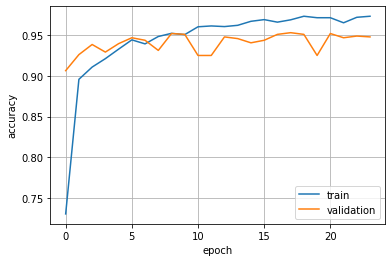

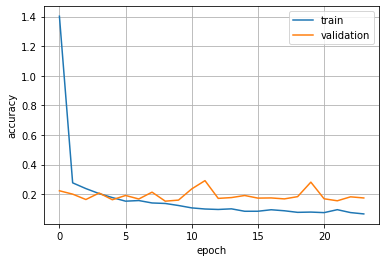

In [ ]:
# Plot accuracy
plt.figure() 
plt.plot(training_history.history['accuracy'], label = 'train')
plt.plot(training_history.history['val_accuracy'], label = 'validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot loss function
plt.figure()
plt.plot(training_history.history['loss'],label = 'train')
plt.plot(training_history.history['val_loss'],label = 'validation')

plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

31/31 [==============================] - 2s 38ms/step - loss: 0.1684 - accuracy: 0.9533
Validation accuracy for 95.33% 

Confusion matrix 



Text(0.5, 1.0, 'Confusion Matrix')

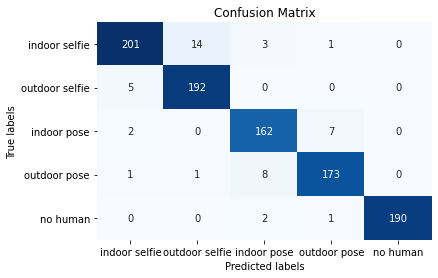

In [ ]:
# Models highest score on validation
model = load_model('/content/drive/My Drive/DataScience/Models/best_model_mobile.pt')
score = model.evaluate(X_test, y_test)
print("Validation accuracy for %.2f%% \n" % (score[1]*100))

# Get probabilities
pred = model.predict(X_test)

# Get predicted class
predictions = []
for i in range(y_test1.shape[0]):
  predictions.append(np.argmax(pred[i]))

print('Confusion matrix \n')
cm = confusion_matrix(y_test1, predictions)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

ax= plt.subplot()
sns.heatmap(df_cm, cmap='Blues', annot=True, cbar =False, fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
# Get the wrong predictions
mistakes = np.array([i for i, _ in enumerate(predictions) if predictions[i]!=y_test1[i]])

X_mistakes = X_test[mistakes]
y_mistakes = y_test1[mistakes]
predictions = np.array(predictions)
pred_mistakes = predictions[mistakes]

In [ ]:
# Calculate ROC AUC Score
n_classes = y_train.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

lw =2
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


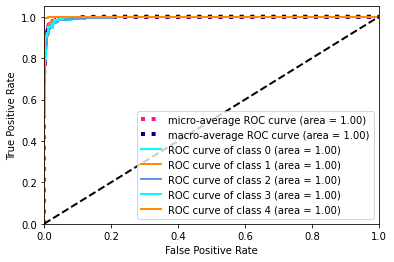

In [ ]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

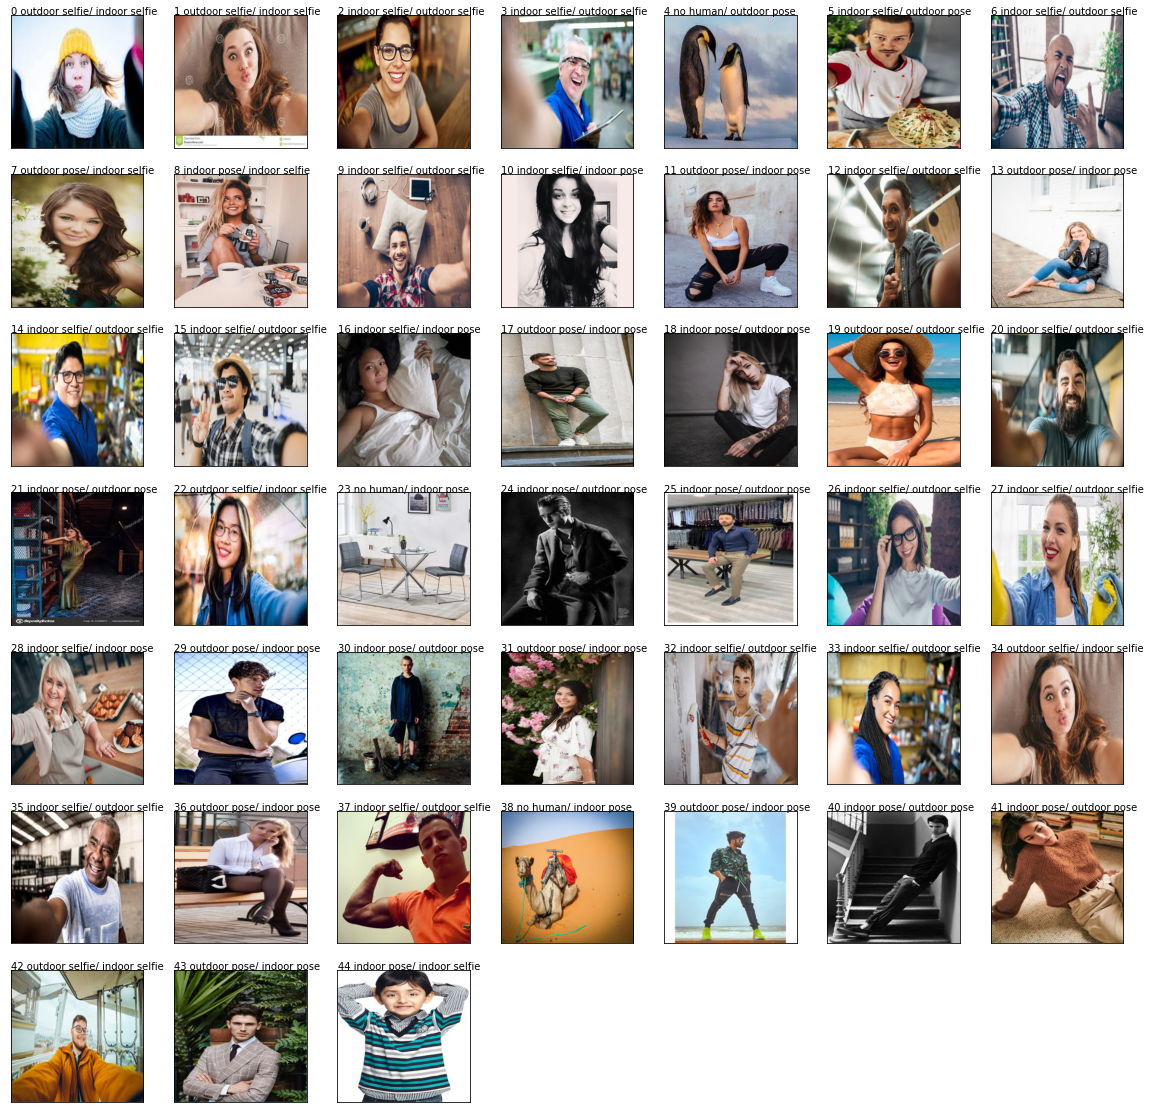

In [ ]:
# Show wrongly predicted images
fig = plt.figure(figsize = (20, 20))
n = math.ceil(math.sqrt(pred_mistakes.shape[0]))

for i in range(pred_mistakes.shape[0]):
    ax1 = fig.add_subplot( n, n, i+1)
    ax1.imshow(array_to_img(X_mistakes[i]))
    title = str(i) + ' ' + str(class_names[y_mistakes[i]]) + '/ ' + str(class_names[pred_mistakes[i]]) # i + true label / predicted
    ax1.text(0, -2, title, size = 10)
    ax1.set_xticks([])
    ax1.set_yticks([])

plt.show()